In [5]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

BASE_DIR      = Path(r"C:\Users\islem\Desktop\R37-LightGBM")
GEOM_OUT_DIR  = BASE_DIR / "geometry_auto"

print("GEOM_OUT_DIR:", GEOM_OUT_DIR)


GEOM_OUT_DIR: C:\Users\islem\Desktop\R37-LightGBM\geometry_auto


In [6]:
def write_curve_section(points_xyz, path, header=None):
    """
    points_xyz: array (n_pts, 3) -> x, y, z
    path: مسار الملف مثل design_xxxx/profile.curve
    header: نص اختياري في أول سطر (تعليق)
    """
    path = Path(path)
    with path.open("w") as f:
        if header is not None:
            f.write(f"# {header}\n")
        for x, y, z in points_xyz:
            f.write(f"{x:.8e} {y:.8e} {z:.8e}\n")


In [7]:
# اختيار مستويات hub / mid / shroud (يمكن تعديلها لاحقًا)
hub_idx, mid_idx, shroud_idx = 0, 4, 8

for design_dir in sorted(GEOM_OUT_DIR.glob("design_*")):
    suct = np.load(design_dir / "suction.npy")   # (9,112,3)
    press = np.load(design_dir / "pressure.npy") # (9,112,3)

    # متوسط السطحين يعطي كيرف مركزي للريشة
    prof_mid    = 0.5 * (suct[mid_idx]    + press[mid_idx])    # (112,3)
    hub_curve   = 0.5 * (suct[hub_idx]    + press[hub_idx])    # (112,3)
    shroud_curve= 0.5 * (suct[shroud_idx] + press[shroud_idx]) # (112,3)

    write_curve_section(prof_mid,     design_dir / "profile.curve",
                        header="Auto profile mid-span")
    write_curve_section(hub_curve,    design_dir / "hub.curve",
                        header="Auto hub")
    write_curve_section(shroud_curve, design_dir / "shroud.curve",
                        header="Auto shroud")

    print("Wrote curves for", design_dir.name)


Wrote curves for design_0020
Wrote curves for design_0277
Wrote curves for design_0658
Wrote curves for design_1136
Wrote curves for design_1187
Wrote curves for design_1228
Wrote curves for design_1372
Wrote curves for design_1660
Wrote curves for design_1835
Wrote curves for design_1991


In [8]:
def plot_section(points_xyz, title="section"):
    x = points_xyz[:, 0]
    y = points_xyz[:, 1]
    plt.figure(figsize=(4, 3))
    plt.plot(x, y, "-o", ms=2)
    plt.axis("equal")
    plt.grid(True)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()
    plt.show()


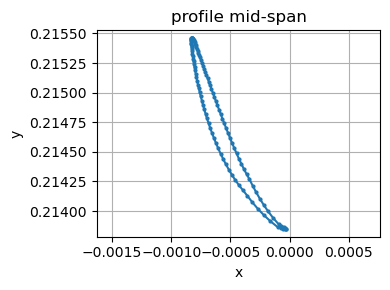

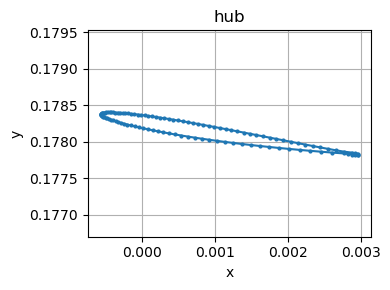

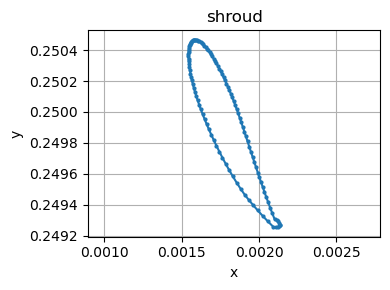

In [9]:
design_dir = GEOM_OUT_DIR / "design_0277"

suct = np.load(design_dir / "suction.npy")
press = np.load(design_dir / "pressure.npy")

hub_idx, mid_idx, shroud_idx = 0, 4, 8

prof_mid     = 0.5 * (suct[mid_idx]    + press[mid_idx])
hub_curve    = 0.5 * (suct[hub_idx]    + press[hub_idx])
shroud_curve = 0.5 * (suct[shroud_idx] + press[shroud_idx])

plot_section(prof_mid,     "profile mid-span")
plot_section(hub_curve,    "hub")
plot_section(shroud_curve, "shroud")
